<a href="https://colab.research.google.com/github/pedrohp09/Machine-Learning/blob/main/Sistemas_de_Recomenda%C3%A7%C3%A3o_Filtragem_Baseada_em_Conte%C3%BAdo_Exerc%C3%ADcio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Pedro Henrique Pereira do Nascimento Lista de Exercícios da disciplina de Machine Learning Exercício 7

AutoML: Introdução

Utilize uma biblioteca de AutoML (como Auto-sklearn ou TPOT) para automatizar o processo de modelagem em um conjunto de dados de classificação. Compare os resultados com modelos tradicionais que você treinou manualmente.



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelos tradicionais
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from tpot import TPOTClassifier

import warnings
warnings.filterwarnings('ignore')


In [22]:
from sklearn.datasets import load_iris


iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])


print("Primeiras linhas do conjunto de dados:")
print(df.head())


print("\nInformações do conjunto de dados:")
print(df.info())


print("\nValores faltantes por coluna:")
print(df.isnull().sum())


Primeiras linhas do conjunto de dados:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Informações do conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-nul

In [23]:
# Definindo as características e o alvo
X = df.drop(['target', 'species'], axis=1)
y = df['target']


In [25]:
# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'treino: {X_train.shape[0]} amostras')
print(f'teste: {X_test.shape[0]} amostras')


treino: 120 amostras
teste: 30 amostras


In [26]:
# Inicializando o modelo
logreg = LogisticRegression(max_iter=200)

# Treinando o modelo
logreg.fit(X_train, y_train)

# Fazendo previsões
y_pred_logreg = logreg.predict(X_test)

# Avaliando o modelo
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Precisão da Regressão Logística: {accuracy_logreg * 100:.2f}%')

print("\nRelatório de Classificação (Regressão Logística):")
print(classification_report(y_test, y_pred_logreg, target_names=iris.target_names))


Precisão da Regressão Logística: 96.67%

Relatório de Classificação (Regressão Logística):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [27]:
# Inicializando o modelo
dt = DecisionTreeClassifier(random_state=42)


dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Precisão da Árvore de Decisão: {accuracy_dt * 100:.2f}%')

print("\nRelatório de Classificação (Árvore de Decisão):")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))


Precisão da Árvore de Decisão: 93.33%

Relatório de Classificação (Árvore de Decisão):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [29]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Precisão do Random Forest: {accuracy_rf * 100:.2f}%')

print("\nRelatório de Classificação (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=iris.target_names))


Precisão do Random Forest: 90.00%

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [30]:

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)


tpot.fit(X_train, y_train)

y_pred_tpot = tpot.predict(X_test)


accuracy_tpot = accuracy_score(y_test, y_pred_tpot)
print(f'Precisão do TPOT (AutoML): {accuracy_tpot * 100:.2f}%')

print("\nRelatório de Classificação (TPOT):")
print(classification_report(y_test, y_pred_tpot, target_names=iris.target_names))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.975

Generation 2 - Current best internal CV score: 0.975

Generation 3 - Current best internal CV score: 0.975

Generation 4 - Current best internal CV score: 0.975

Generation 5 - Current best internal CV score: 0.975

Best pipeline: MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.001)
Precisão do TPOT (AutoML): 100.00%

Relatório de Classificação (TPOT):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




Comparação de Precisões dos Modelos:
                Modelo  Precisão (%)
0  Regressão Logística     96.666667
1    Árvore de Decisão     93.333333
2        Random Forest     90.000000
3        TPOT (AutoML)    100.000000


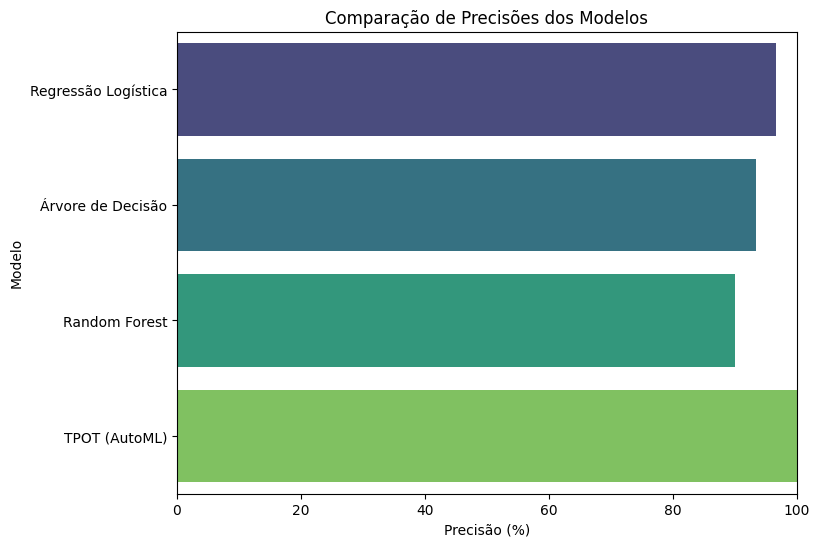

In [31]:
# Criando um DataFrame para comparar as precisões
model_names = ['Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'TPOT (AutoML)']
accuracies = [accuracy_logreg, accuracy_dt, accuracy_rf, accuracy_tpot]

comparison_df = pd.DataFrame({
    'Modelo': model_names,
    'Precisão (%)': [acc * 100 for acc in accuracies]
})

print("\nComparação de Precisões dos Modelos:")
print(comparison_df)

# Plotando a comparação
plt.figure(figsize=(8,6))
sns.barplot(x='Precisão (%)', y='Modelo', data=comparison_df, palette='viridis')
plt.title('Comparação de Precisões dos Modelos')
plt.xlabel('Precisão (%)')
plt.ylabel('Modelo')
plt.xlim(0, 100)
plt.show()
